In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [73]:
df = pd.read_csv('customer_personality_analysis.csv', sep='\t' )

In [74]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [75]:
print('데이터 전체의 행수:',len(df))
print('데이터 컬럼 수:',len(df.columns))

데이터 전체의 행수: 2240
데이터 컬럼 수: 29


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [77]:
df = df.dropna()

In [78]:
len(df)

2216

In [79]:
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [80]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [81]:
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)

In [82]:
days = []
recent_date = max(dates)
for date in dates:
    day_difference = recent_date - date
    days.append(day_difference)
df['Customer_For'] = days

In [83]:
df['Customer_For'].head()

0   971 days
1   125 days
2   472 days
3    65 days
4   321 days
Name: Customer_For, dtype: timedelta64[ns]

In [84]:
df['Customer_For'] = pd.to_numeric(df['Customer_For'], errors='coerce')

In [85]:
df['Customer_For'].head

<bound method NDFrame.head of 0       83894400000000000
1       10800000000000000
2       40780800000000000
3        5616000000000000
4       27734400000000000
              ...        
2235    46742400000000000
2236     5270400000000000
2237    27216000000000000
2238    27302400000000000
2239    67564800000000000
Name: Customer_For, Length: 2216, dtype: int64>

In [86]:
df[['Education', 'Marital_Status']].head()

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married


In [87]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [88]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [89]:
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner',
                              'Together':'Partner',
                              'Absurd':'Alone',
                              'Widow':'Alone',
                              'YOLO':'Alone',
                              'Divorced':'Alone',
                              'Single':'Alone'})

In [90]:
df['Living_With'].value_counts()

Partner    1430
Alone       786
Name: Living_With, dtype: int64

In [91]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [92]:
df['Family_Size'] = (df['Living_With'].replace({'Alone' : 1, 'Partner': 2})+ df['Children'])

In [93]:
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [94]:
df['Is_Parent']

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Is_Parent, Length: 2216, dtype: int32

In [95]:
df['Education'] = df['Education'].replace({'Basic':'Undergraduate',
                                           '2n Cycle':'Undergraduate',
                                           'Graduation':'Graduate',
                                           'Master':'Postgraduate',
                                           'PhD':'Postgraduate'})

In [96]:
df['age'] = 2021-df["Year_Birth"]

In [97]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [98]:
df.Z_CostContact.value_counts()
df.Z_Revenue.value_counts()

11    2216
Name: Z_Revenue, dtype: int64

In [99]:
df = df.rename(columns={'MntWines':'Wines',
                       'MntFruits':'Fruits',
                       'MntMeatProducts':'Meat',
                       'MntFishProducts':'Fish',
                       'MntSweetProducts':'Sweets',
                       'MntGoldProds':'Gold'})

In [100]:
to_drop = ['Marital_Status','Dt_Customer','Year_Birth','Z_CostContact','Z_Revenue','ID']
df = df.drop(to_drop, axis = 1)

In [101]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Living_With,Children,Family_Size,Is_Parent,age,Spent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,Alone,0,1,0,64,1617
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,Alone,2,3,1,67,27
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,Partner,0,2,0,56,776
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,Partner,1,3,1,37,53
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,Partner,1,3,1,40,422


In [102]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Children,Family_Size,Is_Parent,age,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,0.947202,2.592509,0.714350,52.179603,607.075361
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,0.749062,0.905722,0.451825,11.985554,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,25.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,0.000000,2.000000,0.000000,44.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,1.000000,3.000000,1.000000,51.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,1.000000,3.000000,1.000000,62.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,3.000000,5.000000,1.000000,128.000000,2525.000000


In [103]:
To_Plot = [ 'Income', 'Recency', 'Customer_For', 'age', 'Spent', 'Is_Parent']

Reletive Plot Of Some Selected Features: A Data Subset


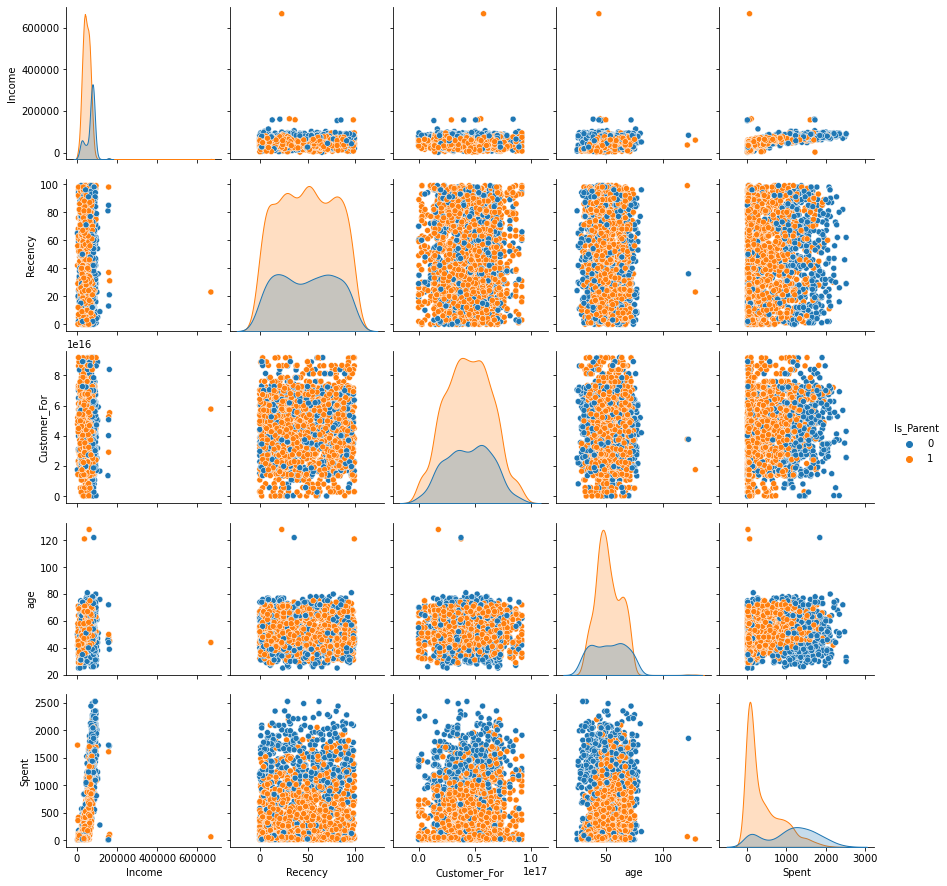

In [104]:
print('Reletive Plot Of Some Selected Features: A Data Subset')
sns.pairplot(df[To_Plot], hue = 'Is_Parent')

In [105]:
df = df[(df['age'] < 90)]
df = df[(df['Income'] < 600000)]
print(len(df))

2212


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Living_With,Children,Family_Size,Is_Parent,age,Spent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,Alone,0,1,0,64,1617
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,Alone,2,3,1,67,27
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,Partner,0,2,0,56,776
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,Partner,1,3,1,37,53
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,Partner,1,3,1,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,46742400000000000,Partner,1,3,1,54,1341
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,5270400000000000,Partner,3,5,1,75,444
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,27216000000000000,Alone,0,1,0,40,1241
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,27302400000000000,Partner,1,3,1,65,843


In [107]:
df.corr()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Children,Family_Size,Is_Parent,age,Spent
Income,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,...,0.327524,0.104036,-0.027900,0.161387,-0.027892,-0.343529,-0.286638,-0.403132,0.199977,0.792740
Kidhome,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,...,-0.174261,-0.081911,0.037067,-0.077901,-0.057731,0.688081,0.583250,0.520355,-0.237497,-0.557949
Teenhome,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,...,-0.145198,-0.015633,0.007746,-0.154402,0.008986,0.698199,0.594481,0.587993,0.361932,-0.137964
Recency,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,...,-0.021147,-0.001429,0.005713,-0.200114,0.030748,0.018062,0.014717,0.002189,0.015694,0.020479
Wines,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,...,0.351610,0.206309,-0.036420,0.246320,0.148745,-0.353356,-0.296702,-0.341994,0.164615,0.892996
Fruits,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,...,0.192417,-0.009924,-0.002956,0.123007,0.059828,-0.395161,-0.341414,-0.410657,0.013447,0.612129
Meat,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,...,0.313379,0.043549,-0.021017,0.237966,0.071381,-0.504176,-0.429948,-0.574147,0.033622,0.845543
Fish,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,...,0.261712,0.002322,-0.019098,0.108135,0.078042,-0.427482,-0.363522,-0.449596,0.041154,0.641884
Sweets,0.523599,-0.377843,-0.163107,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,...,0.245113,0.010142,-0.020569,0.116059,0.076345,-0.389152,-0.330705,-0.402064,0.021516,0.606652
Gold,0.388299,-0.354922,-0.018579,0.018148,0.391461,0.393459,0.357556,0.426299,0.356754,1.000000,...,0.170853,0.050976,-0.030166,0.141096,0.145632,-0.267776,-0.235826,-0.245380,0.059779,0.527101


<AxesSubplot:>

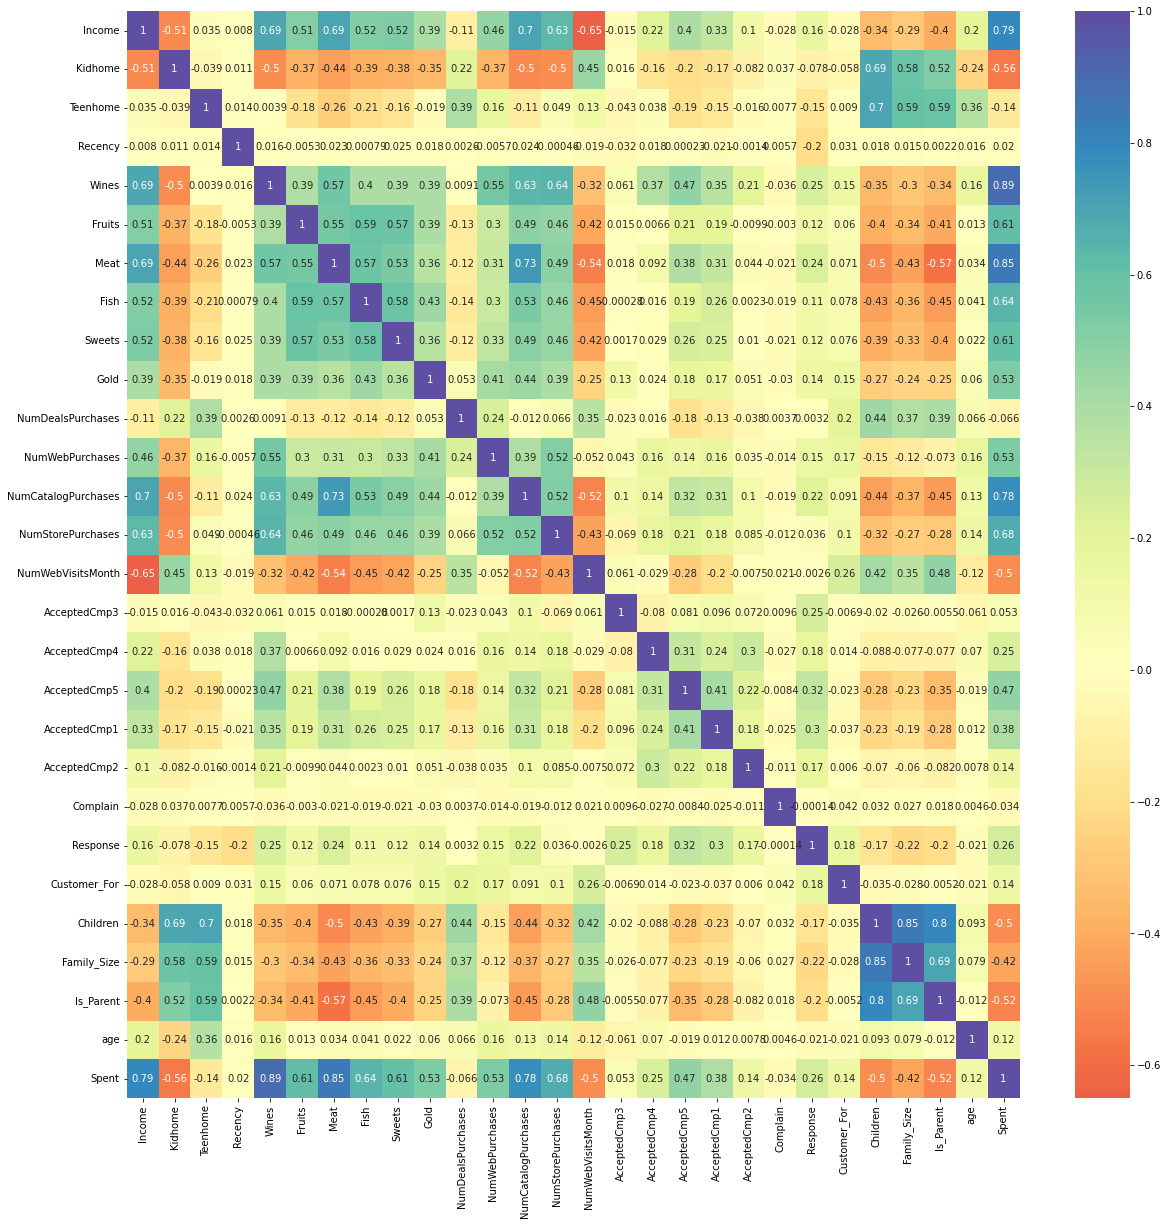

In [112]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, cmap='Spectral', center=0)